In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
df= pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
print("Number of Rows",df.shape[0])
print("Number of Colums",df.shape[1])

Number of Rows 10000
Number of Colums 14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df=df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df = pd.get_dummies(df,drop_first=True)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: xlabel='Exited', ylabel='Count'>

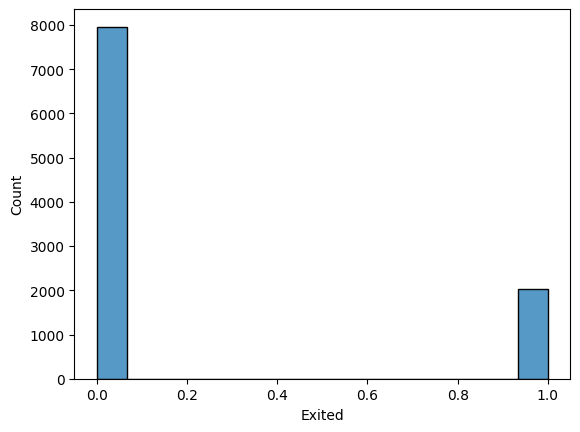

In [ ]:
sns.histplot(df['Exited'])

In [ ]:
X = df.drop('Exited',axis=1)
y = df['Exited']

<Axes: >

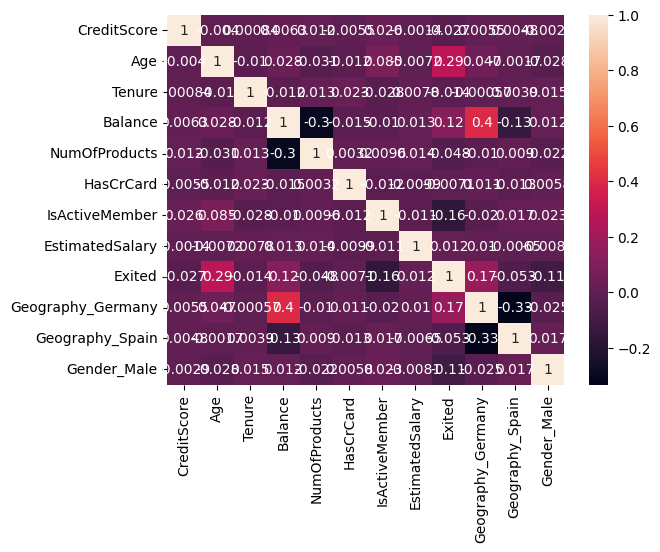

In [ ]:
corr=df.corr()
sns.heatmap(corr,annot=True)

**Handling Imbalanced Data with SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [ ]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

**Splitting The Dataset Into The Training Set And Test Set**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.25869972,  0.79552756, -0.29284923, ..., -0.57650433,
        -0.46213038,  1.17813571],
       [ 1.09650663,  0.09921549, -1.39081838, ..., -0.57650433,
        -0.46213038,  1.17813571],
       [-1.21018252, -0.79604288,  0.43913021, ..., -0.57650433,
        -0.46213038, -0.84879865],
       ...,
       [ 0.20429667,  0.19868864,  1.17110964, ..., -0.57650433,
        -0.46213038,  1.17813571],
       [ 1.02034236,  1.79025908,  0.80511992, ...,  1.73459234,
        -0.46213038, -0.84879865],
       [ 0.53071495,  0.99447386, -1.39081838, ...,  1.73459234,
        -0.46213038,  1.17813571]])

**Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression()

In [ ]:
log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred1 = log.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
accuracy_score(y_test,y_pred1)

0.788135593220339

In [ ]:
precision_score(y_test,y_pred1)

0.7736907730673317

In [ ]:
recall_score(y_test,y_pred1)

0.7990985189954926

In [ ]:
f1_score(y_test,y_pred1)

0.7861894203357618

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred2 = rf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred2)

0.8637790332705587

In [ ]:
precision_score(y_test,y_pred2)

0.8543381887270425

In [ ]:
recall_score(y_test,y_pred2)

0.8686413393432066

In [ ]:
f1_score(y_test,y_pred1)

0.7861894203357618

**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier()

In [ ]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred3 = gbc.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred3)

0.8443188951663528

In [ ]:
precision_score(y_test,y_pred3)

0.8394348105330764

In [ ]:
recall_score(y_test,y_pred3)

0.8415969092079846

In [ ]:
f1_score(y_test,y_pred3)

0.8405144694533763

In [ ]:
final_df=pd.DataFrame({'Models':['LR','RF','GBC'],'ACCURACY':[accuracy_score(y_test,y_pred1),accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3)]})

In [ ]:
final_df

,Models,ACCURACY
0,LR,0.788136
1,RF,0.863779
2,GBC,0.844319


**COMPARISON BETWEEN DIFFERENT MODELS ON THE BASIS OF DIFFERENT MEASUREMENTS**

In [ ]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACCURACY'>

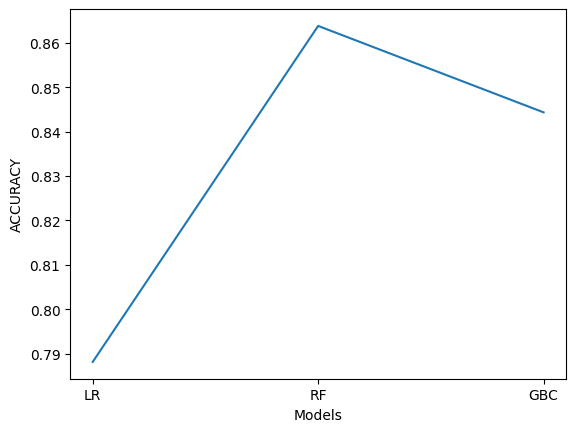

In [ ]:
sns.lineplot(x=final_df.Models,y=final_df.ACCURACY)

In [ ]:
final_df=pd.DataFrame({'Models':['LR','RF','GBC'],'PRECISION':[precision_score(y_test,y_pred1),precision_score(y_test,y_pred2),precision_score(y_test,y_pred3)]})

In [ ]:
final_df

,Models,PRECISION
0,LR,0.773691
1,RF,0.854338
2,GBC,0.839435


<Axes: xlabel='Models', ylabel='PRECISION'>

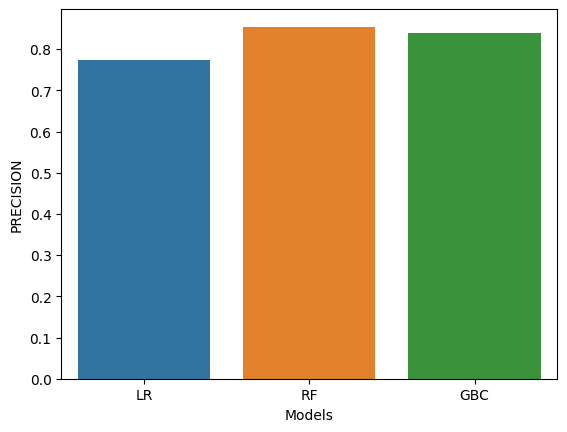

In [ ]:
sns.barplot(x=final_df.Models,y=final_df.PRECISION)

In [ ]:
final_df=pd.DataFrame({'Models':['LR','RF','GBC'],'RECALL':[recall_score(y_test,y_pred1),recall_score(y_test,y_pred2),recall_score(y_test,y_pred3)]})

In [ ]:
final_df

,Models,RECALL
0,LR,0.799099
1,RF,0.868641
2,GBC,0.841597


<Axes: xlabel='Models', ylabel='RECALL'>

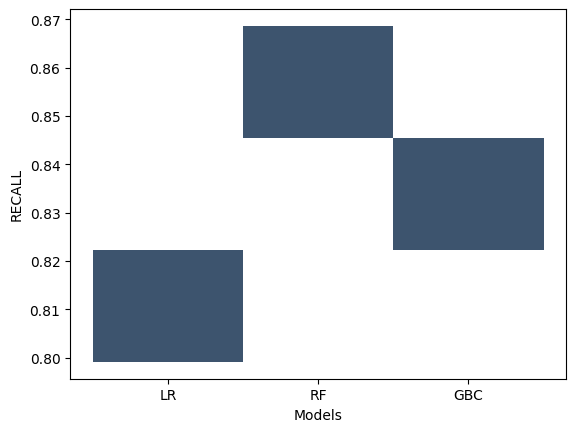

In [ ]:
sns.histplot(x=final_df.Models,y=final_df.RECALL)

**SAVE THE MODEL**

In [ ]:
X_res = sc.fit_transform(X_res)

In [ ]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [ ]:
import joblib

In [ ]:
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [ ]:
model = joblib.load('churn_predict_model')

In [ ]:
model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])

array([1])

In [ ]:
df.columns


Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')